# Introduction to Julia & Jupyter notebooks

This tutorial will cover...

* Jupyter notebook, Anaconda, IJulia installation
* The Jupyter notebook environment
* Basic Julia syntax
* Plotting in Julia

Julia cheatsheet can be found [here](https://cheatsheets.quantecon.org/julia-cheatsheet.html)

**Step 1:** Install Anaconda (includes Jupyter notebook) and Julia (see the [Getting Started lecture](https://lectures.quantecon.org/jl/getting_started.html))

**Step 2:** Install [IJulia](https://github.com/JuliaLang/IJulia.jl) (serves as an interface between Julia and the Jupyter notebooks)

* Open the Julia prompt and run `Pkg.add("IJulia")`

**Step 3:** Install the following libraries
* `Pkg.add("PyPlot")`
* `Pkg.add("PlotlyJS")`
* `Pkg.add("QuantEcon")`
* `Pkg.add("Interact")`

In [1]:
# Compile and import the libraries

using PyPlot
using QuantEcon
using Interact

### Basic operations

In [62]:
1 + 3

4

In [63]:
2^3

8

In [64]:
3//4 + 5//2

13//4

### Arrays and matrices

In [69]:
x = [1, "hi", false]

3-element Array{Any,1}:
     1    
      "hi"
 false    

In [70]:
x

3-element Array{Any,1}:
     1    
      "hi"
 false    

In [72]:
x[1], x[2], x[3]

(1, "hi", false)

In [7]:
typeof(x[1]), typeof(x[2]), typeof(x[3])

(Int64, String, Bool)

In [76]:
# Row vector
x = [1 1]

1×2 Array{Int64,2}:
 1  1

In [79]:
# Column vector
x = [1; 1]

2-element Array{Int64,1}:
 1
 1

In [83]:
# Matrices
A = [1 1;
     2 2]

2×2 Array{Int64,2}:
 1  1
 2  2

In [84]:
# Broadcasting
A + 2.5

2×2 Array{Float64,2}:
 3.5  3.5
 4.5  4.5

In [85]:
# Transposing
A'

2×2 Array{Int64,2}:
 1  2
 1  2

In [90]:
# Matrix multiplication
A * 2x

2-element Array{Int64,1}:
 4
 8

### Unicode variables

Try typing `\alpha` then click `tab` to type unicode characters

In [14]:
α = 0.5

0.5

In [15]:
α

0.5

### `for` loops

In [16]:
ts_length = 100
ϵ = zeros(ts_length)
for i in 1:ts_length
    ϵ[i] = randn()
end

In [17]:
ϵ

100-element Array{Float64,1}:
  1.29356  
  0.137885 
  1.16566  
 -1.31014  
 -0.562781 
 -0.435862 
 -0.260776 
 -0.500412 
  0.902498 
 -1.11114  
 -0.575873 
 -0.232998 
  0.179983 
  ⋮        
  0.98654  
  0.883498 
 -1.66146  
  0.624908 
 -1.81279  
  0.121218 
  1.26116  
  0.665834 
 -0.390889 
 -0.0620731
 -0.27621  
  1.99044  

### Functions

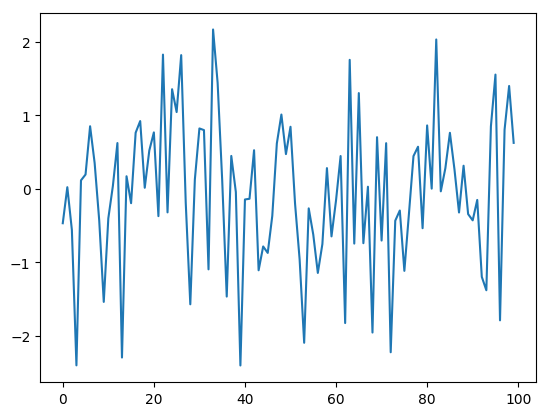

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8ad2afff98>

In [18]:
function generate_data(n)
    ts_length = 100
    ϵ = zeros(ts_length)
    for i in 1:ts_length
        ϵ[i] = randn()
    end
    return ϵ
end

data = generate_data(100)

plot(data)

### Exercise

Create a function `AR1(rho, T)` that simulates an AR1 model with parameter $\alpha$ and returns an array of length `n`

$$
x_{t} = \rho x_{t-1} + \varepsilon_t \quad where \quad x_0 = 0
$$

Plot the result with `rho=0.9` and `T=100`

In [19]:
for i=1:50
    println("Solution below")
end

Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below
Solution below


In [20]:
function AR1(rho, T)
    x = zeros(T)
    for t in 1:T-1
        x[t+1] = rho * x[t] + randn()
    end
    return x
end

AR1 (generic function with 1 method)

## Plotting in Julia

[`PyPlot.jl`](https://github.com/JuliaPy/PyPlot.jl) provides a Julia interface for the Python package `matplotlib`, which was initially based on MATLAB-style plotting

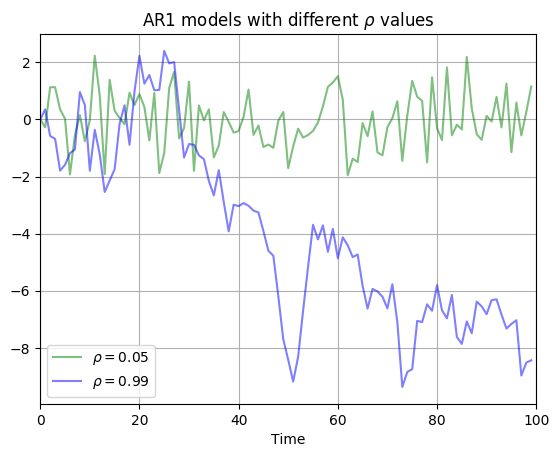

In [21]:
ts_length = 100

for (rho, color) in zip([0.05, 0.99], ["green" "blue"])
    plot(AR1(rho, ts_length), alpha=0.5, label="\$ \\rho = $rho \$", color=color)
end

xlim(0, ts_length)
grid()
xlabel("Time")
title("AR1 models with different \$ \\rho \$ values")
legend()
show()

We can also plot these on separate subplots

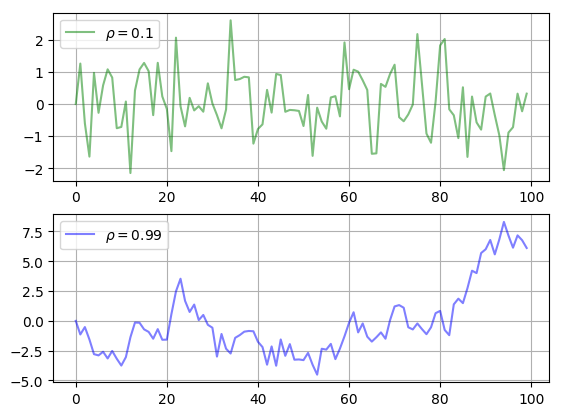

In [61]:
subplot(211)
plot(AR1(0.1, ts_length), alpha=0.5, label="\$ \\rho = 0.1 \$", color="green")
grid()
legend()

subplot(212)
plot(AR1(0.99, ts_length), alpha=0.5, label="\$ \\rho = 0.99 \$", color="blue")
grid()
legend()

show()

### 3D plots

`PyPlot.jl` makes it easy to create 3D plots

Here we will plot a joint Poisson distribution

$$
\begin{split}
f(y_1, y_2) = &
    \frac{\mu_1^{y_1}}{y_1!} e^{-\mu_1} 
    \cdot
    \frac{\mu_2^{y_2}}{y_2!} e^{-\mu_2}
\end{split}
$$

In [23]:
# Define Poisson pdf

function poisson_pdf(y, μ)
    μ.^y ./ factorial.(y) * exp.(-μ)
end

poisson_pdf (generic function with 1 method)

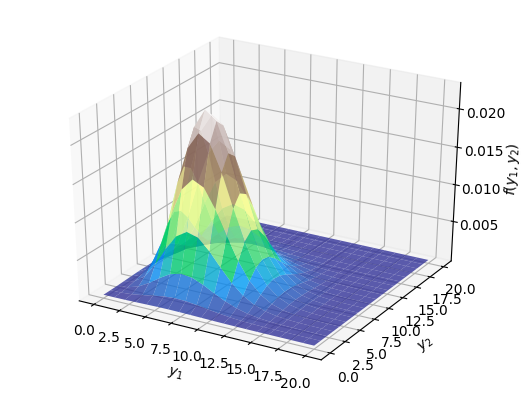

In [24]:
using QuantEcon: meshgrid

function plot_poisson(x_values, μ)
    X, Y = meshgrid(x_values, x_values)
    Z = poisson_pdf(X, μ) .* poisson_pdf(Y, μ)

    surf(X, Y, Z, cmap=ColorMap("terrain"), alpha=0.8)
    
    xlabel(L"$y_1$")
    ylabel(L"$y_2$")
    zlabel(L"$f(y_1, y_2)$")
end

x_values = linspace(0, 20, 20)
plot_poisson(x_values, 7)
show()

### Interactive plots using `Interact`

Interact.Options{:SelectionSlider,Int64}(1: "input" = 10 Int64 , "μ", 10, "10", Interact.OptionDict(DataStructures.OrderedDict("5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10,"11"=>11,"12"=>12,"13"=>13,"14"=>14…), Dict(11=>"11",7=>"7",9=>"9",10=>"10",8=>"8",6=>"6",5=>"5",13=>"13",14=>"14",15=>"15"…)), Any[], Any[], true, "horizontal")

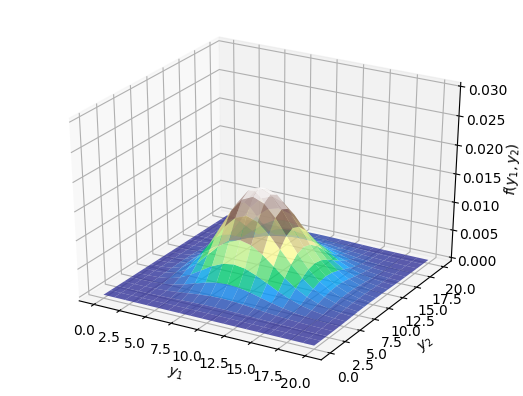

  likely near /home/natashawatkins/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /home/natashawatkins/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /home/natashawatkins/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /home/natashawatkins/.julia/v0.6/IJulia/src/kernel.jl:31


In [25]:
fig = figure()
x_values = linspace(0, 20, 20)

@manipulate for μ=5:15; withfig(fig) do
    plot_poisson(x_values, μ)
    zlim(0, 0.03)
    end
end

### PlotlyJS.jl

[PlotlyJS.jl](https://github.com/sglyon/PlotlyJS.jl) is a Julia wrapper for [plotlyjs](https://plot.ly/javascript/), a javascript graphing library that allows you to create interactive, web-based plots

In [26]:
import PlotlyJS

search: end endof endswith ENDIAN_BOM send send_comm append! QuoteNode

search: end endof endswith ENDIAN_BOM send send_comm append! QuoteNode

search: end endof endswith ENDIAN_BOM send send_comm append! QuoteNode



In [27]:
PlotlyJS.plot(AR1(0.8, 100), 
    line=PlotlyJS.attr(color="red", width=2), 
    PlotlyJS.Layout(xaxis=PlotlyJS.attr(title="Iteration")))

In [60]:
function plot_poisson_3d(x_values, μ)
    X, Y = meshgrid(x_values, x_values)
    Z = poisson_pdf(X, μ) .* poisson_pdf(Y, μ)
    trace = PlotlyJS.surface(x=X, y=Y, z=Z, colorscale="Viridis", opacity=0.9)
    PlotlyJS.plot(trace, PlotlyJS.Layout(height=600, width=600))
end

plot_poisson_3d(x_values, 7)